# 01 - Introduction

## 1 Motivation

Statistical Modeling

In this notebook you will learn about the basics of Python and random simulation. In addition, this session will help you to learn how to use Jupyter Notebook.

## 2 Introduction into Python

### Jupyter Notebook - Cell Types

You can change the type of a cell by clicking on 'Cell' and selecting the desired type.

#### Code Cells

Contents in this cell are treated as statements in a programming language of current kernel. Default kernel is Python. So, we can write Python statements in a code cell. When such cell is run, its result is displayed in an output cell. The output may be text, image, matplotlib plots or HTML tables. Code cells have rich text capability.

#### Markdown Cells

These cells contain text formatted using markdown language. All kinds of formatting features are available like making text bold and italic, displaying ordered or unordered list, rendering tabular contents etc. Markdown cells are especially useful to provide documentation to the computational process of the notebook.

#### Raw Cells

Contents in raw cells are not evaluated by notebook kernel. When passed through nbconvert, they will be rendered as desired. If you type LatEx in a raw cell, rendering will happen after nbconvert is applied.

see: https://www.tutorialspoint.com/jupyter/jupyter_notebook_types_of_cells.htm

### Jupyter Notebook - Command Mode

- shift + enter run cell, select below.
- ctrl + enter run cell.
- option + enter run cell, insert below.
- A insert cell above.
- B insert cell below.
- C copy cell.
- V paste cell.
- D , D delete selected cell.

see: http://maxmelnick.com/2016/04/19/python-beginner-tips-and-tricks.html

### Types

In [2]:
type(3)

int

In [2]:
type(3.0)

float

In [4]:
type(True)

bool

In [5]:
type("Hello")

str

In [6]:
type([1,2,3])

list

In [7]:
type((1,2,3))

tuple

In [8]:
type({"A":1, "B":2, "C":3})

dict

In [9]:
print("Hello " + str(3))

Hello 3


### Lists

In [1]:
testList = [0,1,2,3,4]

In [11]:
testList[0]

0

In [12]:
testList[-1]

4

In [13]:
testList[1:3]

[1, 2]

In [14]:
testList[:4]

[0, 1, 2, 3]

In [15]:
testList.append(5)
testList

[0, 1, 2, 3, 4, 5]

### Control flow

In [16]:
if 5>3:
    print("Trivial")
else:
    print("???")

Trivial


Important: The intendation is in python not optional!

In [17]:
for t in testList:
    print(t)

0
1
2
3
4
5


In [18]:
for i in range(0,2):
    print(testList[i])

0
1


### Methods

In [19]:
def sumup(a,b):
    return a+b

sumup(5,7)

12

In [20]:
a = lambda x: x + 5

a(7)

12

### Classes

In [21]:
class Account:
    
    def __init__(self,account_number):
        self.account_number = account_number
        self.balance = 0
        
    def withdraw(self, amount):
        if self.balance > amount:
            self.balance -= amount
            return 1
        else:
            return 0
        
    def deposit(self,amount):
        self.balance += amount
        
    def show(self):
        return self.balance

In [22]:
k = Account(1706)
k.show()

0

In [23]:
k.deposit(4)
k.show()

4

### Error handling

In [24]:
while True:
    num = input("A number: ")
    try:
        num = int(num)
    except ValueError:
        print("No, a number!")
    else:
        break

A number: 3


### Python Packages

- Python Packages extend the Python core.
- They have to be insalled! (Buzzword: pip install)
- include over import

#### numpy (Scientific Computing)
(Windows: https://www.lfd.uci.edu/~gohlke/pythonlibs/#numpy)

In [1]:
import numpy as np

In [2]:
a = np.matrix([0,1,2,3])
a.reshape([2,2])

matrix([[0, 1],
        [2, 3]])

In [27]:
np.random.uniform(0,10)

0.7844088529652649

In [28]:
np.mean([1,2,3,4,5,6,7,8,9,10])

5.5

#### pandas

In [29]:
import pandas as pd

In [30]:
d = {'Proband A' : pd.Series([15, 20, 23, 12], index =['Treatment 1', 'Treatment 2', 'Treatment 3', 'Treatment 4']), 
     'Proband B' : pd.Series([33, 21, 10, 40], index =['Treatment 1', 'Treatment 2', 'Treatment 3', 'Treatment 4'])} 
pd.DataFrame(d) 

,Proband A,Proband B
Treatment 1,15,33
Treatment 2,20,21
Treatment 3,23,10
Treatment 4,12,40


#### matplotlib

In [3]:
import matplotlib.pyplot as plt

In [4]:
data = np.random.normal(5,2,1000)

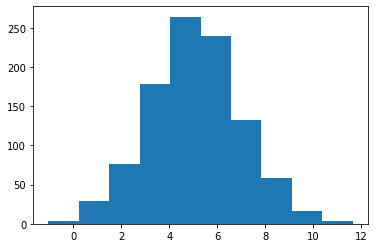

In [5]:
plt.hist(data)
plt.show()

## 3 Monte Carlo Simulations

"Monte Carlo methods (or Monte Carlo experiments) are a broad class of
computational algorithms that rely on repeated random sampling to obtain
numerical results; typically one runs simulations many times over in order to
obtain the distribution of an unknown probabilistic entity. The name comes
from the resemblance of the technique to the act of playing and recording
results in a real gambling casino. They are often used in physical and
mathematical problems and are most useful when it is difficult or impossible to
obtain a closed-form expression, or unfeasible to apply a deterministic
algorithm. Monte Carlo methods are mainly used in three distinct problem
classes: optimization, numerical integration and generation of draws from a
probability distribution." [1]

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math

### 3.1 Flip a coin

Let's flip a coin n-times and note the results:

In [35]:
def coinflip(N):
    return np.random.binomial(1,0.5,N)

Reminder Binomial Distribution: $B(k|n,p) = \binom{n}{k} p^k (1-p)^{n-k}$ 

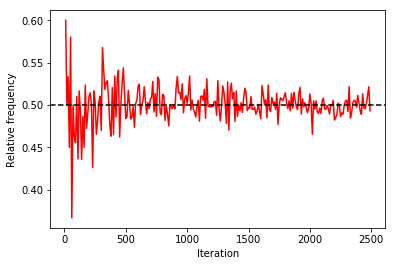

In [48]:
t = range(0,2500,10)
X = []
Y = []
for n in t:
    X.append(n)
    Y.append(np.nanmean(coinflip(n)))
plt.plot(X,Y,'-r')
plt.xlabel('Iteration')
plt.ylabel('Relative frequency')
plt.axhline(0.5,color='black', linestyle = '--')
plt.show()

### 3.2 Law of large numbers for relative frequency [2]

Let $X_n$ be the number of successes for the coin toss, where we regard this random variable as binomially distributed.

Then the expectation value and variance apply respectively: $E(X_n)=np$ and $V(X_n)=np(1-p)$

We designate the relative frequency with $R_n = \frac{1}{n} X_n$ and it holds $E(R_n)=p$ and $V(R_n)=V(\frac{1}{n}X_n)=\frac{1}{n^2}V(X_n) = \sigma^2 = \frac{p(1-p)}{n}$

Using Chebyshev's inequality [3] we get:

\begin{align}
\text{P}(|R_n-p|\geq \varepsilon) \leq \frac{p(1-p)}{n \varepsilon^2} \text{  for all  } \varepsilon > 0
\end{align}

From this, we deduce

\begin{align}
\lim_{n \rightarrow \infty} \text{P}(|R_n-p|\geq \varepsilon) = 0
\end{align}

### 3.3 Monte-Carlo-Integration

We define the function f, we want to integrate over:

In [37]:
def f(x):
    return np.exp(-x) * np.cos(2*np.pi*x)

def f_mirror(x):
    return -f(x)

The area that includes this function f with the x-axis in the interval $[x_{0},x_1]$ is searched for.

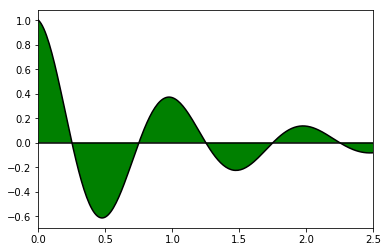

In [38]:
x0, x1 = 0,2.5

t = np.arange(0.0, 5.0, 0.01)
fig, ax = plt.subplots()
plt.plot(t, f(t), 'k')
ax.fill_between(t, f(t), 0,  facecolor='green', interpolate=True)
plt.xlim(x0,x1)
plt.axhline(0,color='black')
plt.show()

For our example in the interval $[0,2.5]$ the true area is about 0.586709.

Generate some random points in the interval $[x_0,x_1] \times [y_0,y_1]$ and count every point under the area! The ratio will give us an approximation for the area.
But how do we get $[y_0,y_1]$?

In [39]:
from scipy.optimize import minimize

y0=min(f(t))
y1=max(f(t))

Let it rain!

In [40]:
def generate_points(n):
    return np.random.uniform(x0,x1,n),np.random.uniform(y0,y1,n)

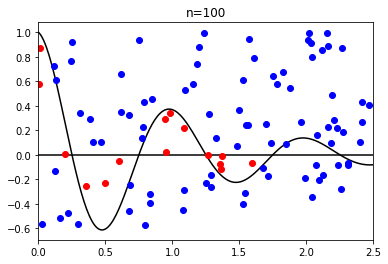

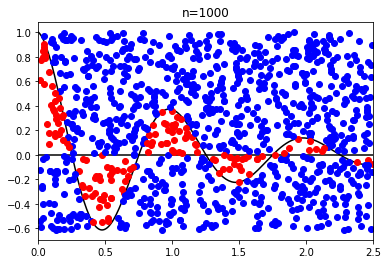

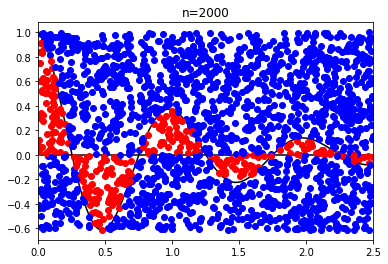

In [41]:
def visualize(n):
    fig, ax = plt.subplots()
    plt.plot(t, f(t), 'k')
    plt.xlim(x0,x1)
    plt.axhline(0,color='black')
    x, y = generate_points(n)
    for i in range(len(y)):
        if abs(y[i]) <= abs(f(x[i])) and np.sign(y[i]) == np.sign(f(x[i])):
            plt.plot(x[i],y[i],'ro')
        else:
            plt.plot(x[i],y[i],'bo')
    plt.title("n=" + str(n))
    plt.show()
    
visualize(100)
visualize(1000)
visualize(2000)

In [42]:
def monte_carlo_integration(n):
    x, y = generate_points(n)
    count_in = 0
    count_out = 0
    for i in range(len(y)):
        if abs(y[i]) <= abs(f(x[i])) and np.sign(y[i]) == np.sign(f(x[i])):
            count_in += 1
        else:
            count_out += 1
    fraction_in = float(count_in)/(count_out+count_in)
    total_area = (y1-y0)*(x1-x0)
    return total_area * fraction_in

Visualize our results:

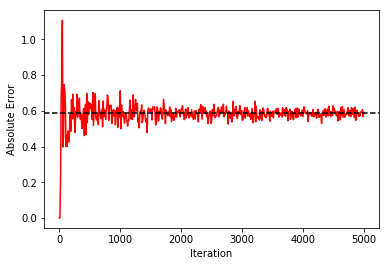

In [51]:
t = range(1,5000,10)
X = []
Y = []
for n in t:
    X.append(n)
    Y.append(monte_carlo_integration(n))
plt.plot(X,Y,'-r')
plt.xlabel('Iteration')
plt.ylabel('Absolute Error')
plt.axhline(0.586709,color='black', linestyle = '--')
plt.show()

## References
[1] https://en.wikipedia.org/wiki/Monte_Carlo_method

[2] Norbert Henze: Stochastik für Einsteiger. Eine Einführung in die faszinierende Welt des Zufalls. 10., überarbeitete Auflage. Springer Spektrum, Wiesbaden 2013, ISBN 978-3-658-03076-6, S. 218 f.

[3] https://en.wikipedia.org/wiki/Chebyshev%27s_inequality